In [1]:
import pymysql
import csv
import pandas as pd
import matplotlib.pyplot as plt

数据获取：利用pymysql库从数据库中爬取所有数据行，并利用csv库将数据保存成SH_Grade.csv文件（不要忘记写入列标题作为第1行内容），由于StuId字段包含班级信息，请在id字段和Sex字段添加一个Class字段用以保存学生所在班级，取值范围为A-G。

In [2]:
db = pymysql.connect(host="cdb-r2g8flnu.bj.tencentcdb.com", port=10209,
                     user="dase2020", password="dase2020", database="dase_intro_2020")
cursor = db.cursor()  # 使用 cursor() 方法创建一个游标对象 cursor,执行SQL语句都是通过游标对象实现

In [3]:
sql = "SELECT * FROM SH_Grade"
cursor.execute(sql)
result = cursor.fetchall()

In [4]:
lst = []
for i in result:
    lst.append(list(i))
print(lst)
for i in range(len(lst)):
    lst[i].insert(2, lst[i][1][0])

[[1, 'A01', 'F', 75.0, 83.0, 95.0, 77.0, 95.0, 96.0, 89.0, 92.0, 98.0, 82.0, 91.0, 98.0, 80.0, 89.0, 93.0, 83.0, 100.0, 95.5, 83.0, 94.0, 99.0, 79.0, 93.0, 92.0, 83.0, 96.0, 95.0, 89.0, 86.0, 89.0, 95.0, 84.0, 80.0, 85.0, 92.0, 85.0, 90.0, 111.0, 111.0, 91.0, 125.0, 130.0, 136.0, 72.0, 51.0, 130.0, 134.0, 136.5, 88.0, 94.0, 120.0, 137.0, 140.0, 79.0, 57.0], [2, 'A02', 'F', 88.0, 100.0, 90.0, 88.0, 100.0, 95.0, 91.0, 96.0, 96.0, 86.0, 94.0, 96.0, 85.0, 94.0, 94.0, 88.0, 95.0, 98.0, 82.0, 94.0, 96.0, 83.0, 93.0, 97.0, 93.0, 97.0, 94.0, 97.0, 89.0, 96.0, 100.0, 91.0, 87.0, 82.0, 93.0, 90.0, 105.0, 118.0, 110.5, 96.0, 132.0, 150.0, 137.0, 82.0, 58.0, 132.0, 146.0, 142.0, 97.0, 96.0, 134.0, 138.0, 145.5, 84.0, 57.0], [3, 'A03', 'F', 85.0, 97.0, 91.0, 87.0, 96.0, 97.0, 93.0, 98.0, 97.0, 88.0, 93.0, 97.0, 84.0, 94.0, 95.0, 91.0, 98.0, 98.0, 78.0, 95.0, 98.0, 83.0, 93.0, 99.0, 93.0, 97.0, 94.0, 94.0, 88.0, 94.0, 99.0, 86.0, 84.0, 89.0, 96.0, 97.0, 104.0, 115.0, 117.5, 97.0, 126.0, 144.0, 136.0

In [5]:
header = ['id', 'StuId', 'Class', 'Sex', 'CHI611', 'MATH611', 'ENG611', 'CHI612', 'MATH612', 'ENG612',
          'CHI621', 'MATH621', 'ENG621', 'CHI622', 'MATH622', 'ENG622',
          'CHI711', 'MATH711', 'ENG711', 'CHI712', 'MATH712', 'ENG712',
          'CHI721', 'MATH721', 'ENG721', 'CHI722', 'MATH722', 'ENG722',
          'CHI811', 'MATH811', 'ENG811', 'PHY811', 'CHI812', 'MATH812', 'ENG812', 'PHY812',
          'CHI821', 'MATH821', 'ENG821', 'PHY821', 'CHI822', 'MATH822', 'ENG822', 'PHY822',
          'CHI911', 'MATH911', 'ENG911', 'PHY911', 'CHE911', 'CHI912', 'MATH912', 'ENG912', 'PHY912', 'CHE912',
          'CHI921', 'MATH921', 'ENG921', 'PHY921', 'CHE921']

In [6]:
with open(r"E:\学习\数据科学与工程导论\lab9\SH_Grade.csv", "w", encoding="utf-8", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for stu in lst:
        writer.writerow(stu)

数据预处理 I：由于人工录入疏忽，数据表中有部分行重复，特征是除id字段之外其他字段值均相同。由于StuId可唯一确定某个学生，所以如果数据表中含有多条StuId相同的数据行，表示这几行内容相同。请先用pandas库读取任务1中导出的CSV文件，然后去除重复的数据行，仅保留第一次出现的数据行，并报告经处理前后的数据条目数量。

In [7]:
stu_data = pd.read_csv(r"E:\学习\数据科学与工程导论\lab9\SH_Grade.csv")
print(f'处理前{stu_data.shape[0]}条')
stu_data_norepeat = stu_data.drop_duplicates(subset=['StuId'])
print(f'去重处理后{stu_data_norepeat.shape[0]}条')

处理前252条
去重处理后243条


数据预处理 II：由于部分同学中途转入或转出该校，或由于疾病缺席某次考试，部分考次的数据会产生空缺，也有部分学生的性别为空。现在请在任务2的基础上剔除大于等于12个字段为空的数据行，并报告经处理前后的数据条目数量。

In [8]:
stu_data_complete = stu_data_norepeat.dropna(thresh=stu_data.shape[1] - 12)
print(f'剔除大于等于12个字段为空的数据行后{stu_data_complete.shape[0]}条')

剔除大于等于12个字段为空的数据行后189条


数据预处理 III：对于仍空缺的数据项，请在任务3的基础上做如下处理：性别用上一条数据行的性别填充，成绩用该次该门考试的中位数填充。

In [9]:
stu_data_fill = stu_data_complete.copy()
stu_data_fill['Sex'] = stu_data_fill['Sex'].fillna(method='ffill')
for i in header[4:]:
    stu_data_fill[i] = stu_data_fill[i].fillna(stu_data_fill[i].median())
print(stu_data_fill)

      id StuId Class Sex  CHI611  MATH611  ENG611  CHI612  MATH612  ENG612  \
0      1   A01     A   F    75.0     83.0    95.0    77.0     95.0    96.0   
1      2   A02     A   F    88.0    100.0    90.0    88.0    100.0    95.0   
2      3   A03     A   F    85.0     97.0    91.0    87.0     96.0    97.0   
3      4   A04     A   F    83.0     97.0    97.0    83.0     94.0    97.0   
4      5   A05     A   F    81.0     89.0    94.0    84.0     89.0    90.0   
..   ...   ...   ...  ..     ...      ...     ...     ...      ...     ...   
237  238   G25     G   M    67.0     49.0    49.0    55.0     54.0    55.0   
238  239   G26     G   M    41.0     43.0    57.0    51.0     63.0    69.0   
239  240   G27     G   M    70.0     80.0    77.0    69.0     75.0    77.0   
241  242   G29     G   M    59.0     12.0    62.0    57.0      9.0    54.0   
242  243   G30     G   M    66.0     56.0    72.0    70.0     62.0    70.0   

     ...  CHI912  MATH912  ENG912  PHY912  CHE912  CHI921  MATH

数据预处理 IV：为了配合旧制中考（语数英满分150分，物理满分90分，化学60分）部分考次不是以百分制计分，为与之前的百分制计分保持一致，请将部分非百分制计分的列转换为百分制计分。

In [17]:
stu_data_trans = stu_data_fill.copy()
for i in header[4:]:
    if 100 < stu_data_trans[i].max() <= 120:
        stu_data_trans[i] = stu_data_trans[i].apply(lambda x: x / 120 * 100)
    elif stu_data_trans[i].max() > 120:
        stu_data_trans[i] = stu_data_trans[i].apply(lambda x: x / 150 * 100)
    elif i[0:4] == "PHY9":
        if stu_data_trans[i].max() <= 90:
            stu_data_trans[i] = stu_data_trans[i].apply(lambda x: x / 90 * 100)
    elif i[0:3] == "CHE":
        if stu_data_trans[i].max() <= 60:
            stu_data_trans[i] = stu_data_trans[i].apply(lambda x: x / 60 * 100)
print(stu_data_trans)

      id StuId Class Sex  CHI611  MATH611  ENG611  CHI612  MATH612  ENG612  \
0      1   A01     A   F    75.0     83.0    95.0    77.0     95.0    96.0   
1      2   A02     A   F    88.0    100.0    90.0    88.0    100.0    95.0   
2      3   A03     A   F    85.0     97.0    91.0    87.0     96.0    97.0   
3      4   A04     A   F    83.0     97.0    97.0    83.0     94.0    97.0   
4      5   A05     A   F    81.0     89.0    94.0    84.0     89.0    90.0   
..   ...   ...   ...  ..     ...      ...     ...     ...      ...     ...   
237  238   G25     G   M    67.0     49.0    49.0    55.0     54.0    55.0   
238  239   G26     G   M    41.0     43.0    57.0    51.0     63.0    69.0   
239  240   G27     G   M    70.0     80.0    77.0    69.0     75.0    77.0   
241  242   G29     G   M    59.0     12.0    62.0    57.0      9.0    54.0   
242  243   G30     G   M    66.0     56.0    72.0    70.0     62.0    70.0   

     ...     CHI912    MATH912     ENG912  PHY912  CHE912     C

数据分析与可视化 I：请绘制各班男女人数的叠加条形图。

Class
A    18
B    16
C    17
D    14
E    13
F     9
G    11
Name: Sex, dtype: int64
Class
A    14
B    18
C    18
D    14
E    11
F     7
G     9
Name: Sex, dtype: int64


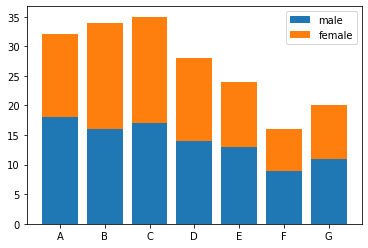

In [11]:
male = stu_data_trans.loc[stu_data_trans['Sex'] == 'M'].groupby('Class')['Sex'].count()
print(male)
female = stu_data_trans.loc[stu_data_trans['Sex'] == 'F'].groupby('Class')['Sex'].count()
print(female)
plt.bar(['A', 'B', 'C', 'D', 'E', 'F', 'G'], male.values, label='male')
plt.bar(['A', 'B', 'C', 'D', 'E', 'F', 'G'], female, bottom=male.values, label='female')
plt.legend()
plt.show()

数据分析与可视化 II：请在一张图表中分别绘制学生代码为A13和A15的学生每次语文考试成绩走势折线图。

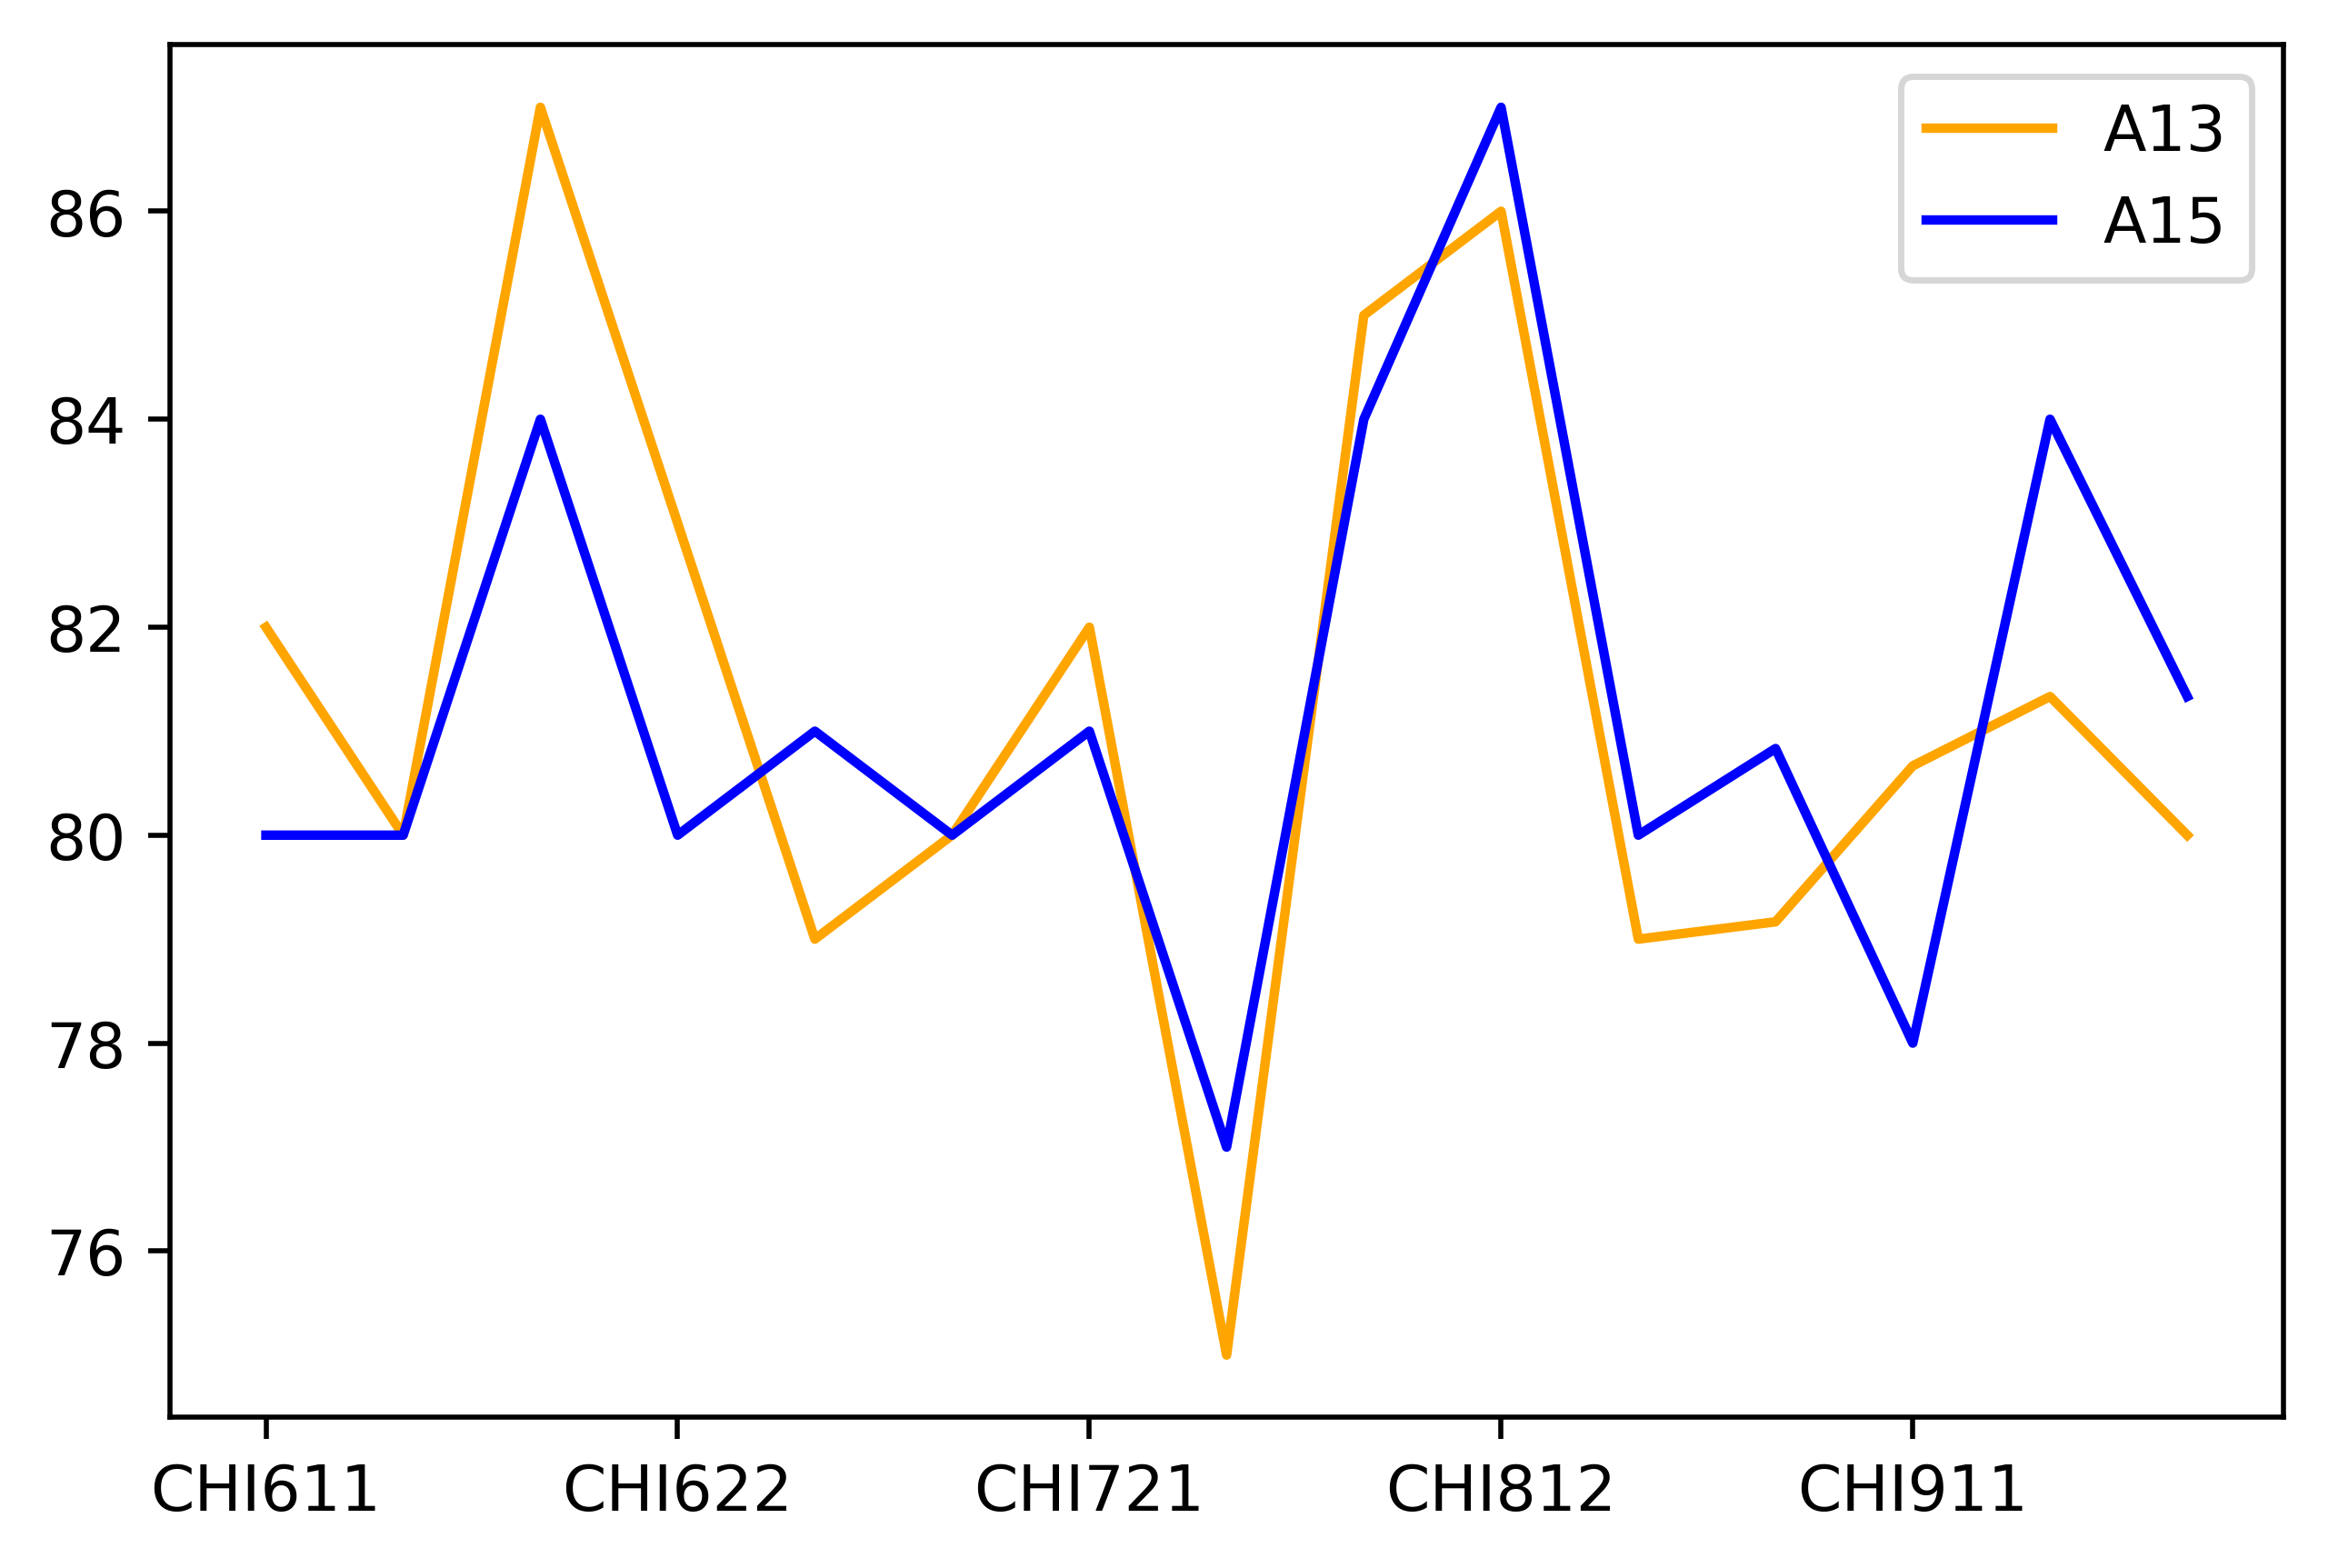

In [20]:
Chinese = []
for i in header:
    if i[0:3] == 'CHI':
        Chinese.append(i)
Chinese_Score = stu_data_trans[Chinese]
a13 = Chinese_Score.loc[stu_data_trans['StuId'] == 'A13']
x = Chinese.copy()
y = a13.values[0]
plt.figure(dpi=500)
plt.plot(x, y, color='orange')
a15 = Chinese_Score.loc[stu_data_trans['StuId'] == 'A15']
x = Chinese.copy()
y = a15.values[0]
plt.plot(x, y, color='blue')
plt.xticks([Chinese[i] for i in range(0, len(Chinese), 3)])
plt.legend(['A13', 'A15'])
plt.show()

数据分析 III：请输出7年级第2学期期中考试中英语成绩小于60分或语文成绩小于60分的学生编号、班级、英语成绩、语文成绩。

In [13]:
lst = ['StuId', 'Class', 'ENG721', 'CHI721']
fail = stu_data_trans.loc[(stu_data_trans['ENG721'] < 60) | (stu_data_trans['CHI721'] < 60)][lst]
print(fail)


    StuId Class  ENG721  CHI721
57    B17     B    30.0    42.0
121   D02     D    51.0    75.0
132   D13     D    54.0    73.0
147   D29     D    54.0    76.0
164   E14     E    47.0    64.0
172   E22     E    46.0    65.0
173   E23     E    54.0    68.0
176   E26     E    26.0    53.0
178   E28     E    36.0    48.0
179   E29     E    53.0    70.0
180   E30     E    34.0    48.0
181   E31     E    56.0    76.0
191   F09     F    36.0    67.0
192   F10     F    37.0    61.0
193   F11     F    34.0    50.0
200   F18     F    53.0    58.0
202   F20     F    82.0    56.0
204   F22     F    79.0    56.0
209   F27     F    53.0    72.0
220   G08     G    53.0    63.0
225   G13     G    41.0    67.0
226   G14     G    52.0    48.0
237   G25     G    44.0    77.0
238   G26     G    76.0    35.0
241   G29     G    60.0    59.0
242   G30     G    82.0    57.0


数据分析 IV：请输出A班和C班6年级第2学期期末考试中各个科目的均值和方差，然后用文字（程序注释）简要比较两个班级各科目的表现情况。

In [14]:
lst2 = ['CHI622', 'MATH622', 'ENG622']
Mean = stu_data_trans.loc[(stu_data_trans['Class'] == 'A') | (stu_data_trans['Class'] == 'C')].groupby("Class")[lst2].mean()
print(Mean)
Var = stu_data_trans.loc[(stu_data_trans['Class'] == 'A') | (stu_data_trans['Class'] == 'C')].groupby("Class")[lst2].var()
print(Var)
# A班语文虽然均分较高，但是成绩差异较大
# 数学成绩略高于C班，同时学生差异远小于C班
# A班英语略落后于C班，但是学生差异略小

          CHI622  MATH622     ENG622
Class                               
A      81.406250    90.75  89.968750
C      76.971429    89.20  91.257143
          CHI622    MATH622     ENG622
Class                                 
A      28.700605  19.935484  32.160282
C      26.263866  71.694118  37.608403


数据存储：将任务8产生的DataFrame对象生成CSV文件，文件名为task8.csv。

In [15]:
fail.to_csv(r'E:\学习\数据科学与工程导论\lab9\task8.csv', index=0)